# KMeans 

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/home/msy/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


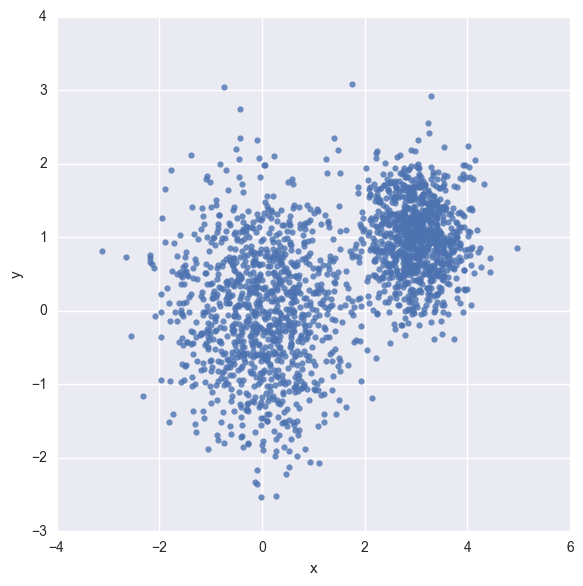

In [40]:
#Load data
def load_data(m):
    num_samples = m
    samples = []
    for i in xrange(num_samples):
        if np.random.random() > 0.5:
            samples.append([np.random.normal(0.0, 0.9), np.random.normal(0.0, 0.9)])
        else:
            samples.append([np.random.normal(3.0, 0.5), np.random.normal(1.0, 0.5)])
    return samples

#Visualize the data
def visualize_data(samples):
    df = pd.DataFrame({"x": [v[0] for v in samples],
                     "y": [v[1] for v in samples]})
    sns.lmplot("x", "y", data=df, fit_reg=False, size=6)
    plt.show()
    
samples = load_data(2000)
visualize_data(samples)
k=5

In [41]:
#def KMeans(samples, k):
vectors = tf.constant(samples)
#Init centroids with k random samples
centroids = tf.Variable(tf.slice(tf.random_shuffle(samples), [0, 0], [k, -1]))
expand_vectors = tf.expand_dims(vectors, 0)
for step in xrange(100):
    expand_centroids = tf.expand_dims(centroids, 1)
    #Assign each node to the nearest cluster
    assignment = tf.argmin(tf.reduce_sum(tf.square(tf.sub(expand_vectors, expand_centroids)), 2), 0)
    #Update the centroids
    nearest_indices = tf.to_int32(assignment)
    partitions = tf.dynamic_partition(samples, nearest_indices, k)
    update_centroids = tf.assign(centroids, [tf.reduce_mean(partition, 0) for partition in partitions])
        
    #return centroids, assignment

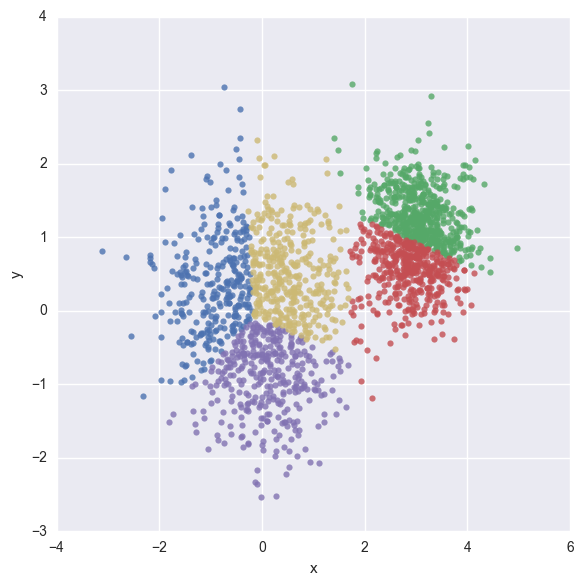

In [42]:
model = tf.initialize_all_variables()
#centroids_, assignment_ = KMeans(samples, 4)
with tf.Session() as sess:
    sess.run(model)
    for step in range(100):
        _ = sess.run(update_centroids)
        centroids_value = sess.run(centroids)
        assignment_value = sess.run(assignment)
        #centroids_value = sess.run(centroids)
        #assignment_value = sess.run(assignment)
    
    data = {"x":[], "y":[], "cluster":[]}
    for i in xrange(len(assignment_value)):
        data["x"].append(samples[i][0])
        data["y"].append(samples[i][1])
        data["cluster"].append(assignment_value[i])
        
    df = pd.DataFrame(data)
    sns.lmplot("x", "y", data=df, fit_reg=False, size=6, hue="cluster", legend=False)
    plt.show()